In [2]:
import matplotlib as plt
import pandas as pd
import requests
import seaborn
import glob
import statsmodels.api as sm
from datetime import date
import numpy as np
import tulipy as tp
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sectors = ['banks']#'fmcg','pharma','housing']

In [4]:
pairs = []
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    n = len(list_of_companies)
    for i in range(n):
        print(i)
        for j in range(i+1, n):
            print(j)
            pairs.append((list_of_companies[i],list_of_companies[j]))

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
2
3
4
5
6
7
8
9
3
4
5
6
7
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
8
9
9


In [5]:
print(pairs)

[('banks\\AXISBANK.csv', 'banks\\BANKBARODA.csv'), ('banks\\AXISBANK.csv', 'banks\\CORPBANK.csv'), ('banks\\AXISBANK.csv', 'banks\\HDFCBANK.csv'), ('banks\\AXISBANK.csv', 'banks\\ICICIBANK.csv'), ('banks\\AXISBANK.csv', 'banks\\INDUSINDBK.csv'), ('banks\\AXISBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\AXISBANK.csv', 'banks\\KOTAKBANK.csv'), ('banks\\AXISBANK.csv', 'banks\\PNB.csv'), ('banks\\AXISBANK.csv', 'banks\\SBIN.csv'), ('banks\\BANKBARODA.csv', 'banks\\CORPBANK.csv'), ('banks\\BANKBARODA.csv', 'banks\\HDFCBANK.csv'), ('banks\\BANKBARODA.csv', 'banks\\ICICIBANK.csv'), ('banks\\BANKBARODA.csv', 'banks\\INDUSINDBK.csv'), ('banks\\BANKBARODA.csv', 'banks\\J&KBANK.csv'), ('banks\\BANKBARODA.csv', 'banks\\KOTAKBANK.csv'), ('banks\\BANKBARODA.csv', 'banks\\PNB.csv'), ('banks\\BANKBARODA.csv', 'banks\\SBIN.csv'), ('banks\\CORPBANK.csv', 'banks\\HDFCBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\ICICIBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\INDUSINDBK.csv'), ('banks\\CORPBANK.csv', 'banks

In [6]:
print(pairs.index(('banks\\HDFCBANK.csv', 'banks\\SBIN.csv')))

29


In [7]:
def trade(S1,S2,window,std):
    ratios = S1/S2
    bands = bolinger(ratios,window,std)
    money=10000
    countS1 = 0
    countS2 = 0
    ratio_array = np.array(ratios)
    rsi = tp.rsi(ratio_array,window)
    indx = (S1.index)[window:]
    df = pd.DataFrame(rsi,columns= ['value'],index  = indx)
    ratios = ratios[window:]
    flag = 10
    #temp = ratios.index[0]
    for i in ratios.index[1:]:
        #print(str(i) + " " + str(temp))
        if (ratios[i] > bands['upper'][i]) and (flag == 0 or flag == 10) and (df['value'][i]>70):
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = -(money/2)/S1[i]
            countS2 = (money/2)/S2[i]
            flag = 1
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < 1
        elif ratios[i] < bands['lower'][i] and (flag == 1 or flag == 10) and (df['value'][i]<30):
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = (money/2)/S1[i]
            countS2 = -(money/2)/S2[i]
            flag = 0
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
         #elif (ratios[i]-bands['middle'][i])*(ratios[temp]-bands['middle'][temp]) < 0:
          #  money += S1[i] * countS1 + S2[i] * countS2
           # countS1 = 0
            #countS2 = 0
           # print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
        #else:
            #print('----')
        #temp = i
    #plt.pyplot.figure(figsize = (25,25))
   # bands['lower'].plot()
    #bands['upper'].plot()
    #bands['middle'].plot()
    #ratios.plot()
    #plt.pyplot.legend(['lower','upper','middle','ratio'])
    return money

In [20]:
def trade1(S1,S2,windows):
    window = windows[0] + 1
    std = windows[1]*0.1 + 0.5
    print(window)
    print(std)
    dates = []
    returns = [10000]
    ratios = S1/S2
    ratio_array = np.array(ratios)
    rsi = tp.rsi(ratio_array,window)
    indx = (S1.index)[window:]
    df = pd.DataFrame(rsi,columns= ['value'],index  = indx)
    bands = bolinger(ratios,window,std)
    money=10000
    countS1 = 0
    countS2 = 0
    ratios = ratios[window:]
    flag = 10
    #temp = ratios.index[0]
    for i in ratios.index[1:]:
        if (ratios[i] > bands['upper'][i]) and (flag == 0 or flag == 10):
            if (df['value'][i]>70):
                money += S1[i] * countS1 + S2[i] * countS2
                countS1 = -(money/2)/S1[i]
                countS2 = (money/2)/S2[i]
                print(S1[i])
                print(S2[i])
                print(i)
                print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
                returns.append(money)
                flag = 1
                dates.append(ratios.index.get_loc(i))
            else:
                print('rejected rsi = ' + str(df['value'][i]))
        #above the upper band only get liquidated when crossed the lower band                      
        # Buy long if the z-score is < 1
        elif ratios[i] < bands['lower'][i] and (flag == 1 or flag == 10) and (df['value'][i]<30):
            if (df['value'][i]<30):
                money += S1[i] * countS1 + S2[i] * countS2
                countS1 = (money/2)/S1[i]
                countS2 = -(money/2)/S2[i]
                print(S1[i])
                print(S2[i])
                print(i)
                print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
                returns.append(money)
                flag = 0
                dates.append(ratios.index.get_loc(i))
            else:
                print('rejected rsi = ' + str(df['value'][i]))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
        #elif (ratios[i]-bands['middle'][i])*(ratios[temp]-bands['middle'][temp]) < 0:
         #   money += S1[i] * countS1 + S2[i] * countS2
          #  countS1 = 0
           # countS2 = 0
            
           # print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            #print(S1[i])
            #print(S2[i])
        #else:
            #print('----')
        #temp = i
    #plt.pyplot.figure(figsize = (25,25))
    #bands['lower'].plot()
    #bands['upper'].plot()
    #bands['middle'].plot()
    #plt.pyplot.plot(ratios.index,ratios,'-gD',markevery = dates)
    #plt.pyplot.legend(['lower','upper','middle','ratio'])
    testing.append(returns[-1])
    return (pd.Series(returns))

In [21]:
def bolinger(series,window,multiple):
    middle = series.rolling(window = window).mean()
    deviation = series.rolling(window = window).std()
    upper = middle.add(deviation*multiple,fill_value = 0)
    lower = middle.subtract(deviation*multiple,fill_value = 0)
    dictionary = {'lower':lower,'middle':middle,'upper':upper}
    return dictionary

In [22]:
def optimal_window2(name1,name2):
    main = []
    data1 = (pd.read_csv(name1,parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    data2 = (pd.read_csv(name2,parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    start_date = '20160101'
    end_date = '20181231'
    set1 = (data1[start_date:end_date])
    set2 = (data2[start_date:end_date]) 
    max_money = 0
    window = 0
    std = 0
    cumsum = 0
    count = 1
    for f in range(200):
        for s in np.linspace(0.1,3,30):
            money =  trade(set1['Adj Close'],set2['Adj Close'],f,s)
            cumsum = cumsum + money
            if money > max_money:
                max_money = money
                window = f
                std = s
            count = count + 1
    print(max_money)
    print(window)
    print(std)
    print('Avg Return')
    print(cumsum/count)
    print('------------')

In [23]:
def optimal_window(name1,name2):
    main = []
    data1 = (pd.read_csv(name1,parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    data2 = (pd.read_csv(name2,parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    start_date = '20140101'
    end_date = '20161231'
    set1 = (data1[start_date:end_date])
    set2 = (data2[start_date:end_date])               
    for f in range(1,100):
        row =  [trade(set1['Adj Close'],set2['Adj Close'],f,s) for s in np.linspace(0.5,3.5,31)]
        main.append(row)
    scores = np.array(main)
    windows = np.unravel_index(np.argmax(scores),shape=(99,31))
    print(np.argmax(scores))
    print(windows)
    print('training' + str(scores[windows[0],windows[1]]))
    training.append(scores[windows[0],windows[1]])
    cumsum = 0
    count = 1
    for i in np.nditer(scores):
        cumsum = cumsum + i
        count = count + 1
    print('Avg Return')
    print(cumsum/count)
    print(np.mean(scores))
    avg.append(np.mean(scores))
    return windows

In [ ]:
arr = optimal_window(pairs[-2][0],pairs[-2][1])

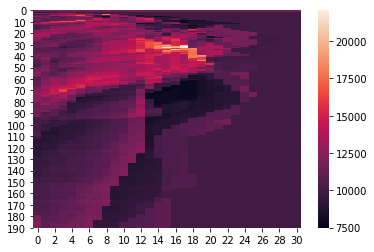

In [101]:
plt.figure.Figure(figsize = (25,25))
seaborn.heatmap(arr)

In [20]:
arr = optimal_window2(pairs[27][0],pairs[27][1])

19194.065500954006
21
0.5
Avg Return
11587.316265856523
------------


In [22]:
print(np.linspace(0.1,3,30))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [63]:
data1 = (pd.read_csv(pairs[27][0],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
data2 = (pd.read_csv(pairs[27][1],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
start_date = '20181201'
end_date = ''
set1 = (data1[start_date:])
set2 = (data2[start_date:])                 
ser = (trade1(set1['Adj Close'],set2['Adj Close'],(32,2.2)))
plt.pyplot.figure(figsize = (25,25))
ser.plot()

32
0.72


TypeError: Cannot convert Series to numpy.ndarray

In [18]:
df = pd.DataFrame(list(zip(training,avg,testing)), 
               columns =['Training', 'avg','testing']) 
df.to_csv('result_bolinger_2017_data.csv')

In [15]:
def RSI(series, period):
     delta = series.diff().dropna()
     u = delta * 0
     d = u.copy()
     u[delta > 0] = delta[delta > 0]
     d[delta < 0] = -delta[delta < 0]
     u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
     u = u.drop(u.index[:(period-1)])
     d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
     d = d.drop(d.index[:(period-1)])
     rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
     pd.stats.moments.ewma(d, com=period-1, adjust=False)
     return 100 - 100 / (1 + rs)
 


In [57]:
i = 27
print(pairs[i])
data1 = (pd.read_csv(pairs[i][0],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
data2 = (pd.read_csv(pairs[i][1],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
start_date = '20161231'
end_date = '20171231'
set1 = (data1[start_date:end_date])
set2 = (data2[start_date:end_date])
arr = np.array(set1['Adj Close'])
rsi = tp.rsi(arr,15)
indx = (set1['Adj Close'].index)[15:]
df = pd.DataFrame(rsi,columns= ['value'],index  = indx)

#df.set_index(index)
print(df)
print(((set1['Adj Close'].index)[15:]))


('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv')
                value
Date                 
2017-01-23  70.580512
2017-01-24  75.748018
2017-01-25  79.135701
2017-01-27  79.961218
2017-01-30  75.194422
...               ...
2017-12-22  59.329854
2017-12-26  55.458723
2017-12-27  52.963811
2017-12-28  57.362106
2017-12-29  56.988262

[233 rows x 1 columns]
DatetimeIndex(['2017-01-23', '2017-01-24', '2017-01-25', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-01-02', '2017-02-02',
               '2017-03-02', '2017-06-02',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=233, freq=None)


In [26]:
training =[]
windows = []
avg = []
testing = []
for i in pairs:
    print(i)
    window_1 = optimal_window(i[0],i[1])
    print('----')
    data1 = (pd.read_csv(i[0],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    data2 = (pd.read_csv(i[1],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
    start_date = '20161231'
    end_date = '20171231'
    set1 = (data1[start_date:end_date])
    set2 = (data2[start_date:end_date])
    trade1(set1['Adj Close'],set2['Adj Close'],window_1)

('banks\\AXISBANK.csv', 'banks\\BANKBARODA.csv')
169
(5, 14)
training21957.249908023172
Avg Return
10316.54964440392
10319.911178989922
----
6
1.9000000000000001
484.975983
167.53923
2017-02-13 00:00:00
Selling Ratio 10000.0 2.8947010380792606 -10.30978888700969 29.843756593604972
463.774109
136.800003
2017-10-18 00:00:00
Buying Ratio 9301.212836485409 3.390161541151428 10.027740505545781 -33.99566020654769
rejected rsi = 69.13638999271029
('banks\\AXISBANK.csv', 'banks\\CORPBANK.csv')
300
(9, 21)
training21608.05553672938
Avg Return
9962.751419865184
9965.997673178916
----
10
2.6
('banks\\AXISBANK.csv', 'banks\\HDFCBANK.csv')
201
(6, 15)
training21290.543536431687
Avg Return
10195.131656753478
10198.453628619483
----
7
2.0
483.640747
659.624634
2017-02-17 00:00:00
Buying Ratio 10000.0 0.7332060115268526 10.338252165506642 -7.5800686364299725
539.6298830000001
829.115051
2017-07-20 00:00:00
Selling Ratio 9294.08081241971 0.6508504246173672 -8.611532742358996 5.604819741970713
463.77410

386
(12, 14)
training17635.75272791066
Avg Return
10286.86736080119
10290.219223740516
----
13
1.9000000000000001
rejected rsi = 59.67357337250261
rejected rsi = 58.85736418755878
rejected rsi = 57.514242069114275
rejected rsi = 61.93099800385604
rejected rsi = 66.50372645808258
495.88421600000004
1680.859009
2017-07-09 00:00:00
Buying Ratio 10000.0 0.29501832892874125 10.082998891015317 -2.97466948341769
rejected rsi = 58.044190251359105
rejected rsi = 60.314861136762566
rejected rsi = 62.944378505049016
rejected rsi = 64.47054711588387
('banks\\AXISBANK.csv', 'banks\\J&KBANK.csv')
102
(3, 9)
training25075.92351787343
Avg Return
10299.501708679036
10302.857688382102
----
4
1.4
445.56271399999997
62.599998
2017-01-20 00:00:00
Buying Ratio 10000.0 7.117615467016468 11.2217648445332 -79.87220702467116
rejected rsi = 50.03223295746751
493.72900400000003
77.150002
2017-05-24 00:00:00
Selling Ratio 9378.369848115799 6.399598071300115 -9.497487257317172 60.78010113412439
501.83911100000006
8

288
(9, 9)
training23673.907649307977
Avg Return
10493.534740892099
10496.953944131234
----
10
1.4
rejected rsi = 61.81921540083029
rejected rsi = 69.47465118559487
rejected rsi = 64.43782853777974
184.963318
246.57608
2017-03-02 00:00:00
Selling Ratio 10000.0 0.7501267681763778 -27.032387037953118 20.27771712487278
174.43936200000002
268.832886
2017-05-24 00:00:00
Buying Ratio 10735.804867933559 0.6488765738280994 30.77231177884484 -19.967432235826905
rejected rsi = 53.508572231155036
rejected rsi = 54.63612379396145
rejected rsi = 58.84584283080003
rejected rsi = 61.10700344340866
rejected rsi = 67.31914859894923
rejected rsi = 64.82378833533463
rejected rsi = 68.37462188852841
rejected rsi = 67.73834991111691
141.600006
263.79629500000004
2017-10-10 00:00:00
Selling Ratio 9825.829755977154 0.5367778421603684 -34.69572506930951 18.623896434893357
160.5
307.639862
2017-12-29 00:00:00
Buying Ratio 9986.618811485863 0.521713925356006 31.110962029550976 -16.231022122038695
('banks\\BANKB

102
(3, 9)
training15603.709600423903
Avg Return
10066.142181572635
10069.422123632465
----
4
1.4
171.907654
140.350006
2017-01-02 00:00:00
Selling Ratio 10000.0 1.2248496376979137 -29.08538324884592 35.625221134653884
172.155869
152.399994
2017-03-30 00:00:00
Buying Ratio 10422.064058766813 1.1296317308253963 30.269267377596094 -34.19312489857058
rejected rsi = 60.52661735161803
161.100006
137.149994
2017-06-30 00:00:00
Selling Ratio 10608.856340232942 1.1746264166807037 -32.926306471499885 38.67610938514858
163.600006
154.899994
2017-07-18 00:00:00
Buying Ratio 11213.04151564058 1.0561653475596648 34.26968552690817 -36.19445432528739
rejected rsi = 32.22440246866958
138.0
138.850006
2017-06-09 00:00:00
Selling Ratio 10916.657918121025 0.9938782429724922 -39.553108398989224 39.31097387968793
141.899994
136.850006
2017-06-10 00:00:00
Buying Ratio 10683.779084924241 1.0369016279034726 37.64545291286003 -39.03463140850809
rejected rsi = 63.65652528522359
rejected rsi = 65.40443183716124


775
(25, 0)
training17328.06631538038
Avg Return
10168.982494156733
10172.295945604803
----
26
0.5
rejected rsi = 60.19006993158585
rejected rsi = 60.59157107215663
rejected rsi = 57.13550673161802
rejected rsi = 53.65213725907254
rejected rsi = 53.898698342302986
rejected rsi = 53.15771071327124
rejected rsi = 52.9769529722503
rejected rsi = 55.02597632642324
rejected rsi = 61.324696120962564
rejected rsi = 59.77407604775152
rejected rsi = 55.1445796866168
rejected rsi = 60.874556014105885
rejected rsi = 68.35875437714914
rejected rsi = 65.27227329947584
rejected rsi = 61.564036183172355
rejected rsi = 55.95151282032529
rejected rsi = 54.881946691976616
rejected rsi = 55.973761665906665
rejected rsi = 57.776815954431406
rejected rsi = 58.19055144878159
rejected rsi = 55.99919604874827
rejected rsi = 57.80049189167904
rejected rsi = 59.44706892375894
rejected rsi = 59.86445147510422
rejected rsi = 61.155696217034475
rejected rsi = 62.945919315155464
rejected rsi = 65.95551909314665
rej

258
(8, 10)
training37825.12458580351
Avg Return
10922.125936377457
10925.684791358355
----
9
1.5
249.248901
77.0
2017-02-23 00:00:00
Buying Ratio 10000.0 3.236998714285714 20.060268991918242 -64.93506493506493
rejected rsi = 62.99824939456079
rejected rsi = 51.635687038826795
rejected rsi = 54.90880002426508
rejected rsi = 56.8790416642568
rejected rsi = 69.50685833629521
rejected rsi = 56.63204998192214
rejected rsi = 60.73766257748596
rejected rsi = 69.2759082306991
291.963959
84.25
2017-07-14 00:00:00
Selling Ratio 10386.096332706169 3.465447584569733 -17.78660689538425 61.6385539033007
252.62721299999998
74.0
2017-10-19 00:00:00
Buying Ratio 10453.968392842915 3.4138812567567567 20.690503348194156 -70.63492157326294
rejected rsi = 63.033921356254844
rejected rsi = 68.67096904845388
312.146729
77.349998
2017-10-11 00:00:00
Selling Ratio 11448.830291923223 4.035510498655734 -18.33885994673233 74.00666184841545
('banks\\ICICIBANK.csv', 'banks\\KOTAKBANK.csv')
186
(6, 0)
training17853

266
(8, 18)
training20198.323704648912
Avg Return
9515.291669102953
9518.392122563071
----
9
2.3
1663.487305
138.850006
2017-06-09 00:00:00
Selling Ratio 10000.0 11.980462607974248 -3.005733788873129 36.01008126711928
1573.026245
201.899994
2017-10-25 00:00:00
Buying Ratio 12542.337056390174 7.7911158580817 3.9866903353510716 -31.060766293014783
('banks\\INDUSINDBK.csv', 'banks\\SBIN.csv')
422
(13, 19)
training17390.004881078585
Avg Return
10313.41244068344
10316.772953045986
----
14
2.4000000000000004
rejected rsi = 62.942959689958855
rejected rsi = 68.57722276437691
1767.421387
270.850006
2017-11-09 00:00:00
Selling Ratio 10000.0 6.525461871320764 -2.82898013839639 18.46040202782938
1573.026245
324.700012
2017-10-25 00:00:00
Buying Ratio 11544.032755679771 4.844552469557654 3.669370677181477 -17.776458775861965
('banks\\J&KBANK.csv', 'banks\\KOTAKBANK.csv')
354
(11, 13)
training24666.971890418987
Avg Return
10729.83898395777
10733.335184343567
----
12
1.8
rejected rsi = 66.4221464940

In [14]:
print(len(training))
print(len(avg))
print(len(testing))

45
45
45


In [15]:
df = pd.DataFrame(list(zip(training,avg,testing)), 
               columns =['Training', 'avg','testing']) 
df.to_csv('result_bolinger_rsi_2017_data.csv')

In [19]:
i = pairs[0]
print(i)
window_1 = optimal_window(i[0],i[1])
print('----')
data1 = (pd.read_csv(i[0],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
data2 = (pd.read_csv(i[1],parse_dates = ['Date'],index_col = 'Date')).interpolate(axis=0)
start_date = '20140101'
end_date = '20161231'
set1 = (data1[start_date:end_date])
set2 = (data2[start_date:end_date])
trade1(set1['Adj Close'],set2['Adj Close'],(6,14))

('banks\\AXISBANK.csv', 'banks\\BANKBARODA.csv')
169
(5, 14)
training21957.249908023172
Avg Return
10316.54964440392
10319.911178989922
----
6
1.9000000000000001
206.024506
107.19937900000001
2014-01-15 00:00:00
Buying Ratio 10000.0 1.9218815250786105 24.268957596723954 -46.642061238059966
285.30233799999996
151.618576
2014-09-05 00:00:00
Selling Ratio 9852.187436548757 1.881710971879857 -17.266222747443376 32.49004078678578
286.53515600000003
175.177124
2014-05-14 00:00:00
Buying Ratio 10596.31951175115 1.635688207782199 18.49043527446096 -30.2445869351958
357.972534
162.945679
2014-11-06 00:00:00
Selling Ratio 12287.162727482915 2.196882643325571 -17.16215849046524 37.70324810970567
467.61166399999996
211.243134
2014-11-28 00:00:00
Buying Ratio 12226.489530598537 2.2136182849853 13.073336779082716 -28.93937733994833
rejected rsi = 66.00997925705632
527.1992190000001
140.883759
2015-08-05 00:00:00
Selling Ratio 15041.65420748358 3.7420865452631773 -14.265626413497758 53.38320866170095

0     10000.000000
1     10000.000000
2      9852.187437
3     10596.319512
4     12287.162727
5     12226.489531
6     15041.654207
7     18449.244124
8     20270.958244
9     20388.347889
10    21957.249908
dtype: float64